In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from skimpy import skim

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

In [59]:
from arch import arch_model
from arch.univariate import ARCH, GARCH, ARX

In [2]:
df = pd.read_csv('data/TATASTEEL.csv', parse_dates=['Date'], index_col=['Date'])

In [6]:
FIG_SIZE = (20, 10)

<AxesSubplot:xlabel='Date'>

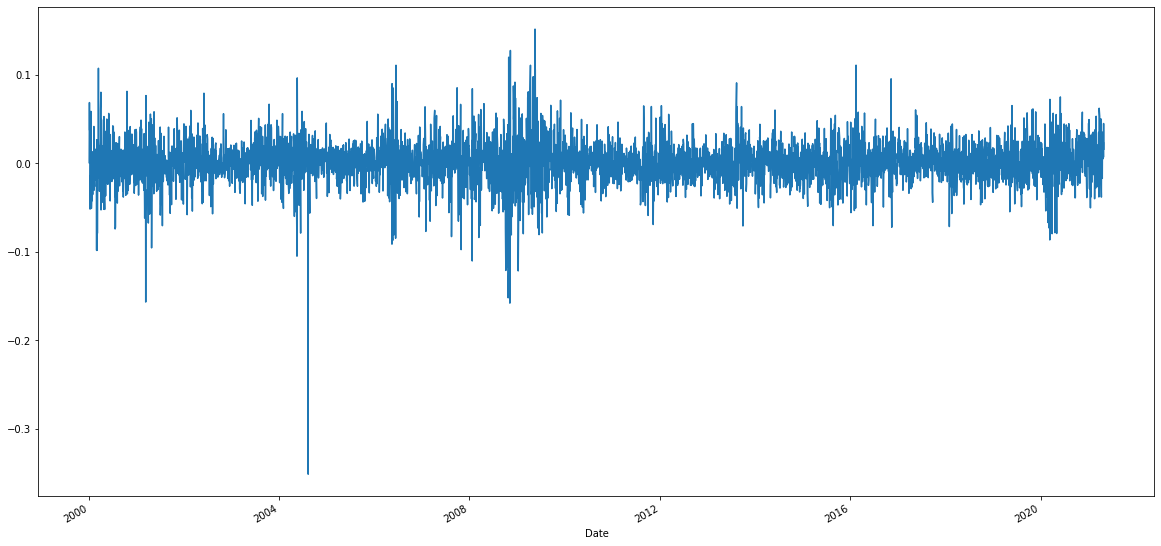

In [7]:
df['VWAP'].pct_change().plot(figsize=FIG_SIZE)

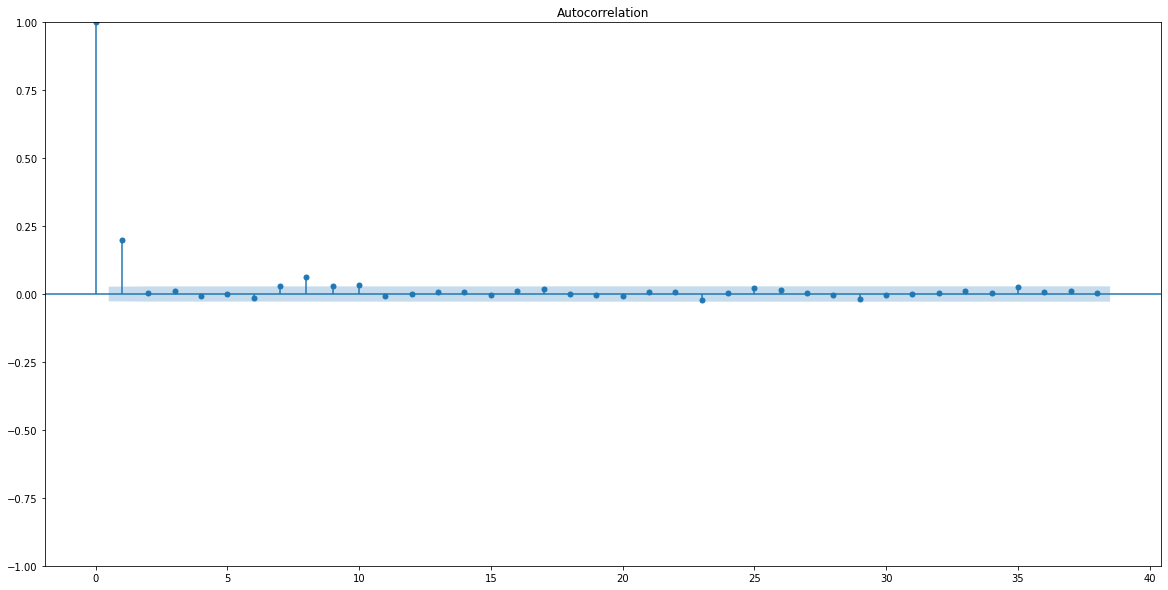

In [11]:
fig = plot_acf(df['VWAP'].pct_change().dropna());
fig.set_size_inches(*FIG_SIZE)

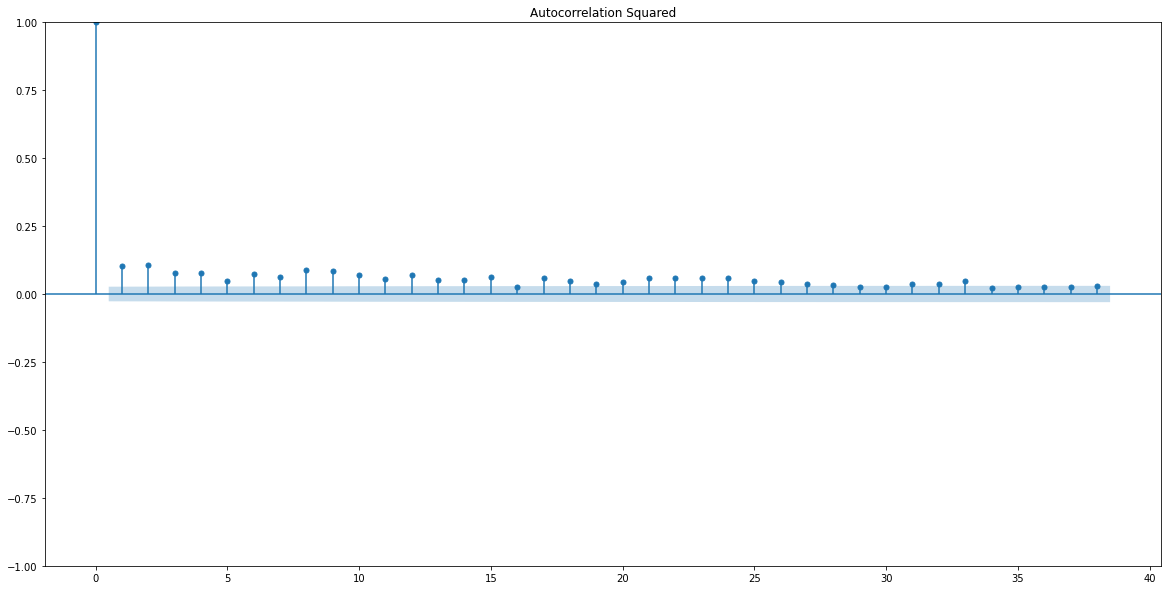

In [13]:
fig = plot_acf(df['VWAP'].pct_change().dropna() ** 2, title='Autocorrelation Squared');
fig.set_size_inches(*FIG_SIZE)

/home/mahyar/Works/ShittyStuff/TS/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


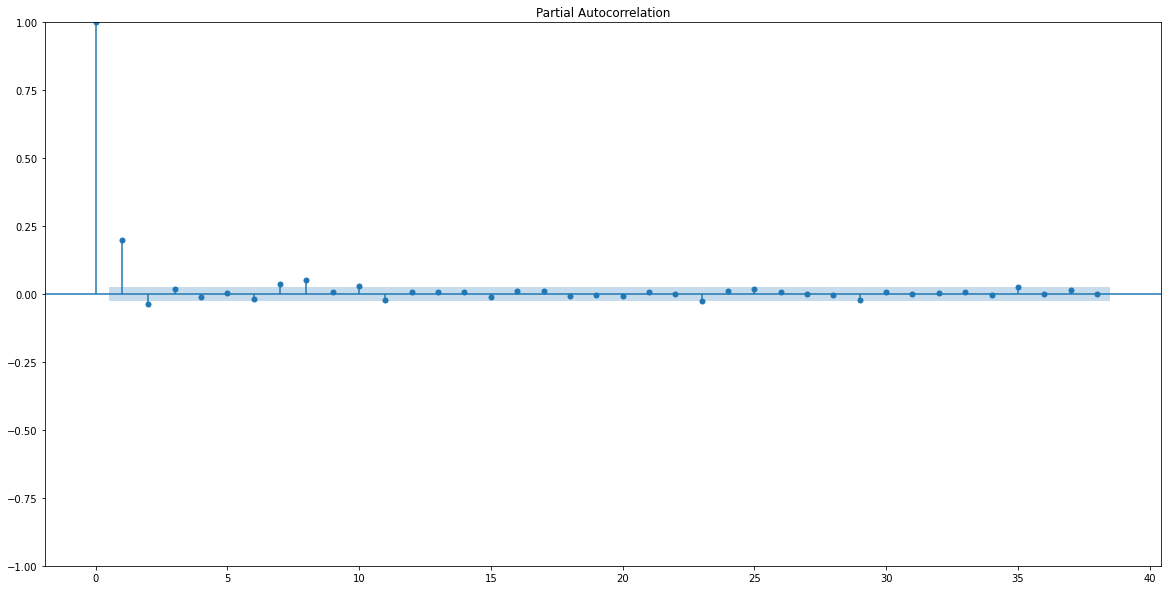

In [14]:
fig = plot_pacf(df['VWAP'].pct_change().dropna());
fig.set_size_inches(*FIG_SIZE)

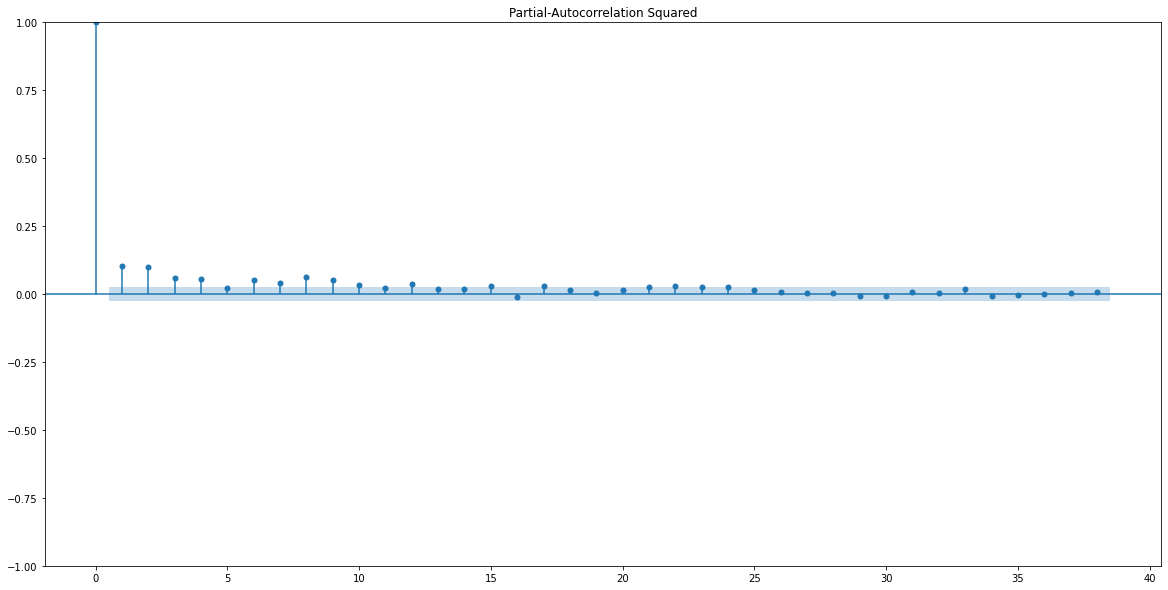

In [16]:
fig = plot_pacf(df['VWAP'].pct_change().dropna() ** 2, title='Partial-Autocorrelation Squared');
fig.set_size_inches(*FIG_SIZE)

In [19]:
model = arch_model(100 * df['VWAP'].pct_change().dropna(), p=1, q=0)
result = model.fit(update_freq=5)
print(result.summary())

Iteration:      5,   Func. Count:     29,   Neg. LLF: 12069.911926721015
Iteration:     10,   Func. Count:     49,   Neg. LLF: 12065.877055535053
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12065.877055535053
            Iterations: 11
            Function evaluations: 52
            Gradient evaluations: 11
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   VWAP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -12065.9
Distribution:                  Normal   AIC:                           24137.8
Method:            Maximum Likelihood   BIC:                           24157.5
                                        No. Observations:                 5305
Date:                Sat, Jun 18 2022   Df Residuals:                     5304
Time:       

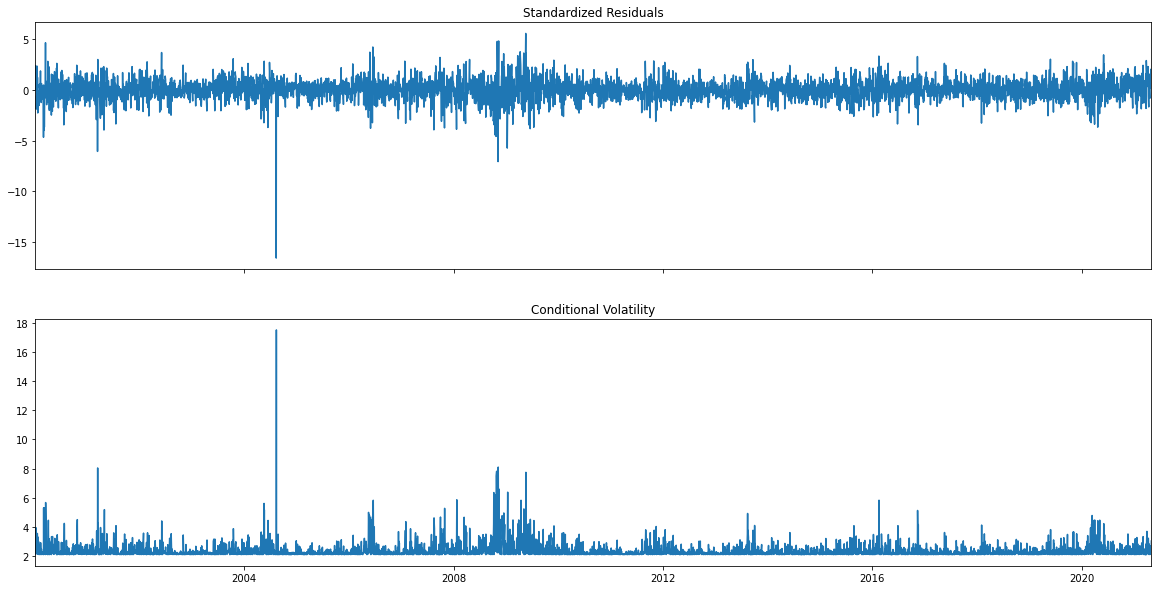

In [21]:
fig = result.plot()
fig.set_size_inches(*FIG_SIZE)

In [22]:
st_resid = result.resid / result.conditional_volatility

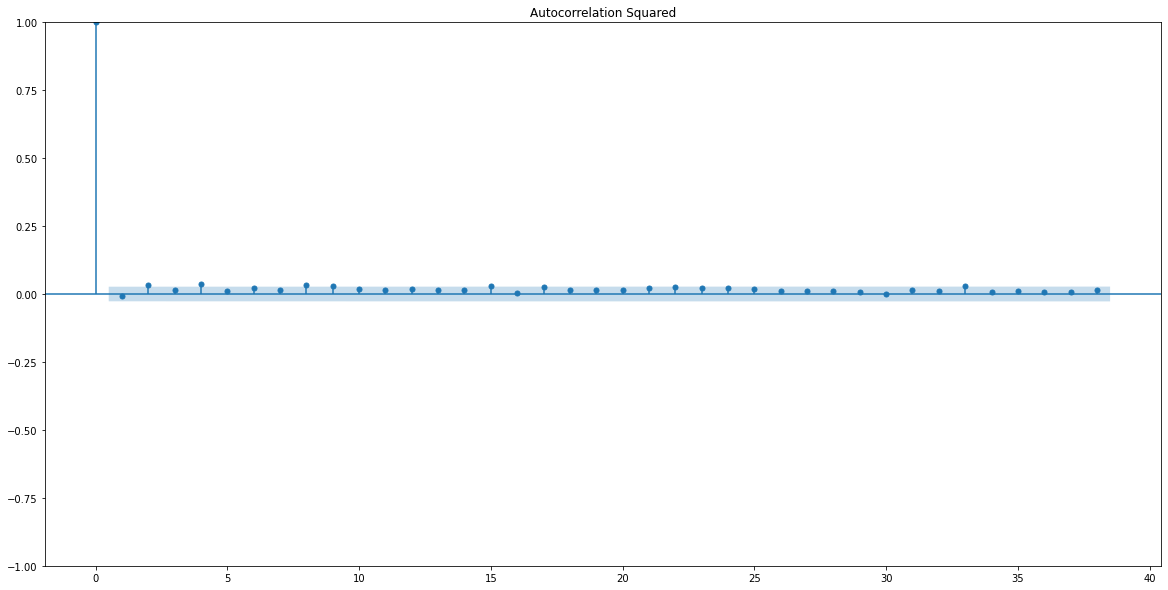

In [27]:
fig = plot_acf(st_resid ** 2, title='Autocorrelation Squared')
fig.set_size_inches(*FIG_SIZE)

In [32]:
# Ljung-Box, NULL: There is not serial dependency -> P-Value < 0.05: There IS serial dependency!

lb_test = acorr_ljungbox(df['VWAP'].pct_change().dropna() ** 2, lags=5)
for lag in range(5):
    print(f'lag: {lag}, P-Value: {lb_test.iloc[lag, 1]:.4f}')

lag: 0, P-Value: 0.0000
lag: 1, P-Value: 0.0000
lag: 2, P-Value: 0.0000
lag: 3, P-Value: 0.0000
lag: 4, P-Value: 0.0000


In [34]:
# Ljung-Box, NULL: There is not serial dependency -> P-Value < 0.05: There IS serial dependency!

lb_test = acorr_ljungbox(st_resid ** 2, lags=5)
for lag in range(5):
    print(f'lag: {lag}, P-Value: {lb_test.iloc[lag, 1]:.4f}')

lag: 0, P-Value: 0.6417
lag: 1, P-Value: 0.0429
lag: 2, P-Value: 0.0520
lag: 3, P-Value: 0.0064
lag: 4, P-Value: 0.0096


In [47]:
# Engle ARCH, NULL: The Variance is not showing Heteroskedasticity effect.

ea_test = het_arch(df['VWAP'].pct_change().dropna(), nlags=5)
print(f'P-Value for Lagrange multiplier: {ea_test[1]:.4f}')
print(f'P-Value for F test: {ea_test[3]:.4f}')

P-Value for Lagrange multiplier: 0.0000
P-Value for F test: 0.0000


In [50]:
# Engle ARCH, NULL: The Variance is not showing Heteroskedasticity effect.

ea_test = het_arch(st_resid, nlags=5)
print(f'P-Value for Lagrange multiplier: {ea_test[1]:.4f}')
print(f'P-Value for F test: {ea_test[3]:.4f}')

P-Value for Lagrange multiplier: 0.0112
P-Value for F test: 0.0112


In [51]:
model = arch_model(100 * df['VWAP'].pct_change().dropna(), p=1, q=1)
result = model.fit(update_freq=5)
print(result.summary())

Iteration:      5,   Func. Count:     34,   Neg. LLF: 11789.691304509706
Iteration:     10,   Func. Count:     63,   Neg. LLF: 11777.3686531613
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11777.368636205327
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   VWAP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11777.4
Distribution:                  Normal   AIC:                           23562.7
Method:            Maximum Likelihood   BIC:                           23589.0
                                        No. Observations:                 5305
Date:                Sat, Jun 18 2022   Df Residuals:                     5304
Time:         

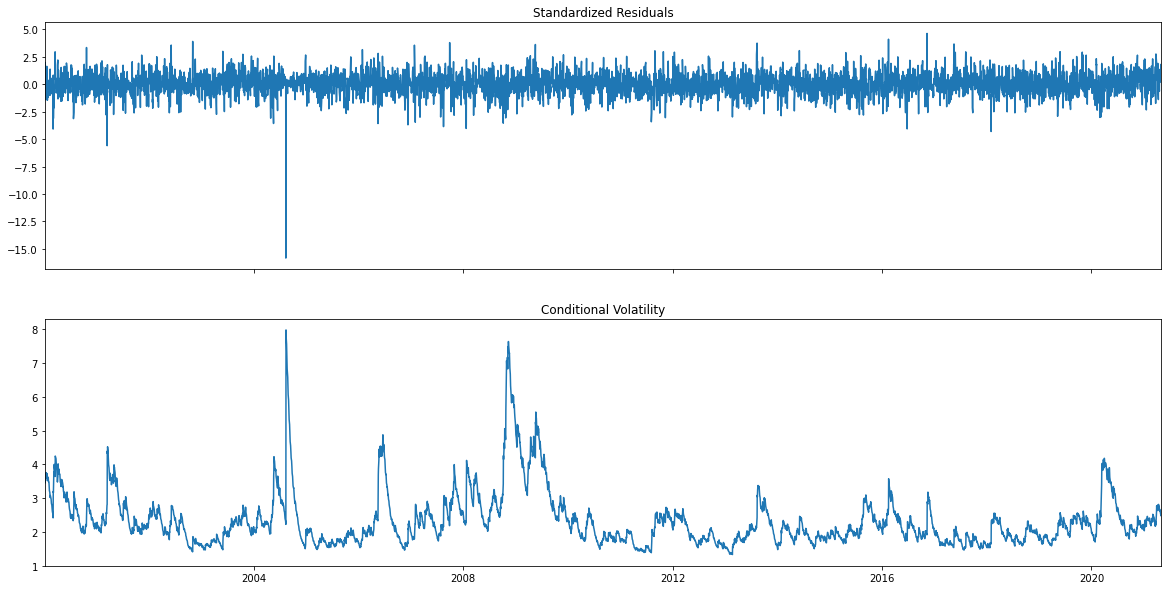

In [52]:
fig = result.plot()
fig.set_size_inches(*FIG_SIZE)

In [53]:
st_resid = result.resid / result.conditional_volatility

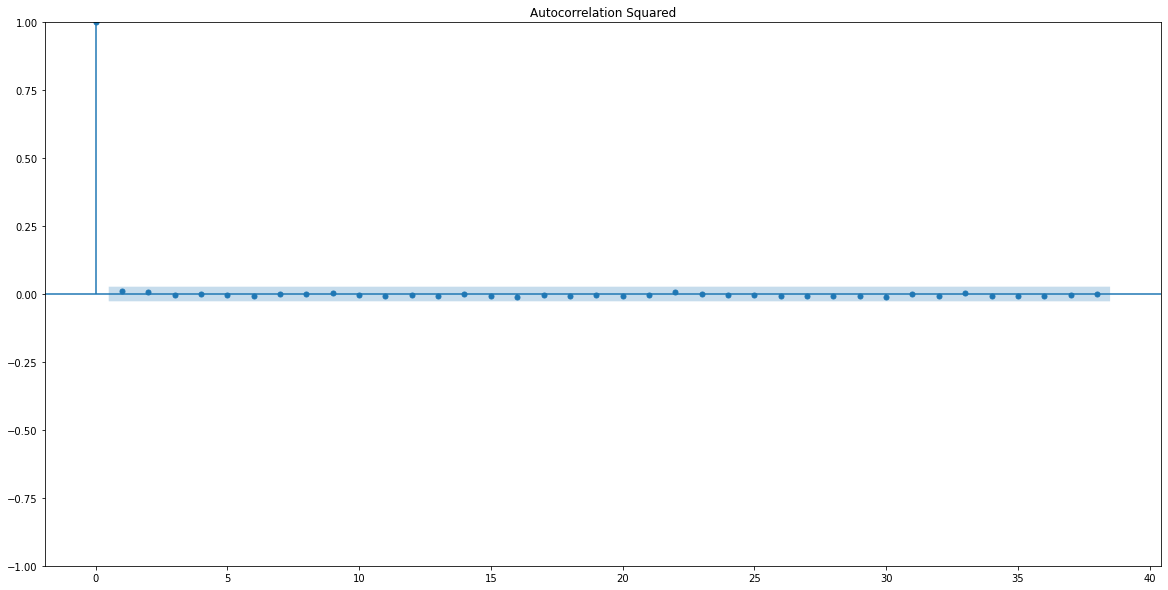

In [54]:
fig = plot_acf(st_resid ** 2, title='Autocorrelation Squared')
fig.set_size_inches(*FIG_SIZE)

In [56]:
# Ljung-Box, NULL: There is not serial dependency -> P-Value < 0.05: There IS serial dependency!

lb_test = acorr_ljungbox(st_resid ** 2, lags=5)
for lag in range(5):
    print(f'lag: {lag}, P-Value: {lb_test.iloc[lag, 1]:.4f}')

lag: 0, P-Value: 0.4793
lag: 1, P-Value: 0.6972
lag: 2, P-Value: 0.8456
lag: 3, P-Value: 0.9358
lag: 4, P-Value: 0.9709


In [58]:
# Engle ARCH, NULL: The Variance is not showing Heteroskedasticity effect.

ea_test = het_arch(st_resid, nlags=5)
print(f'P-Value for Lagrange multiplier: {ea_test[1]:.4f}')
print(f'P-Value for F test: {ea_test[3]:.4f}')

P-Value for Lagrange multiplier: 0.9711
P-Value for F test: 0.9712


In [60]:
ar = ARX(100 * df['VWAP'].pct_change().dropna(), lags=[1, 3])
ar.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     AR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:                   VWAP   R-squared:                       0.039
Mean Model:                        AR   Adj. R-squared:                  0.038
Vol Model:          Constant Variance   Log-Likelihood:               -12132.0
Distribution:                  Normal   AIC:                           24272.0
Method:            Maximum Likelihood   BIC:                           24298.3
                                        No. Observations:                 5302
Date:                Sat, Jun 18 2022   Df Residuals:                     5299
Time:                        15:28:38   Df Model:                            3
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0508  3.310e-02      1.535      0.125   [-1.407e-02,  0.116]
VWAP[1]        0.1962  2.071e-02      9.473  2.716e-21      [  0.156,  0.237]
VWAP[3]        0.0113  1.970e-02      0.576      0.565 [-2.726e-02,4.995e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
sigma2         5.6889      0.295     19.315  4.026e-83 [  5.112,  6.266]
========================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [61]:
ar.volatility = GARCH(p=1, q = 1)
result = ar.fit(update_freq=0, disp="off")
print(result.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   VWAP   R-squared:                       0.038
Mean Model:                        AR   Adj. R-squared:                  0.038
Vol Model:                      GARCH   Log-Likelihood:               -11666.5
Distribution:                  Normal   AIC:                           23344.9
Method:            Maximum Likelihood   BIC:                           23384.4
                                        No. Observations:                 5302
Date:                Sat, Jun 18 2022   Df Residuals:                     5299
Time:                        15:28:59   Df Model:                            3
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.0357  3.132e-02      1.140      0.

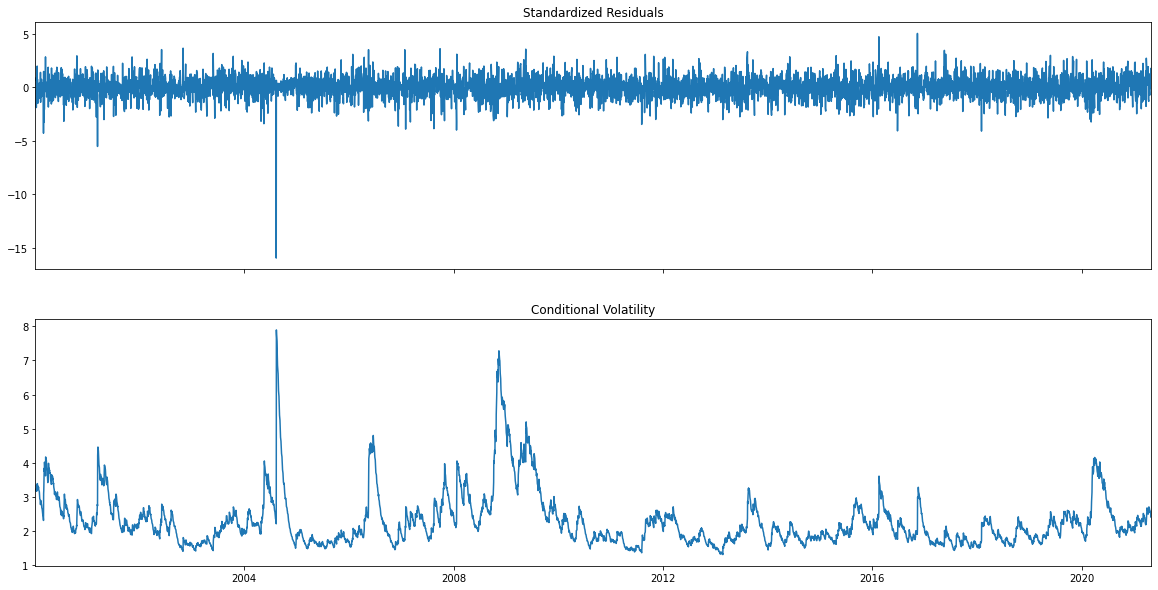

In [62]:
fig = result.plot()
fig.set_size_inches(*FIG_SIZE)

In [65]:
df.index[0], df.index[-1]

(Timestamp('2000-01-03 00:00:00'), Timestamp('2021-04-30 00:00:00'))

In [131]:
cutoff = '2021-01-01'

vwap = df['VWAP'].copy().pct_change().dropna() * 100

train_ds, valid_ds = vwap[vwap.index < cutoff], vwap[vwap.index >= cutoff]

In [132]:
train_ds.shape, valid_ds.shape

((5225,), (80,))

In [133]:
ar = ARX(train_ds, lags=7)
ar.volatility = GARCH(p=1, q = 1)
result = ar.fit(update_freq=0, disp="off")
print(result.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   VWAP   R-squared:                       0.041
Mean Model:                        AR   Adj. R-squared:                  0.039
Vol Model:                      GARCH   Log-Likelihood:               -11458.8
Distribution:                  Normal   AIC:                           22939.6
Method:            Maximum Likelihood   BIC:                           23011.7
                                        No. Observations:                 5218
Date:                Sat, Jun 18 2022   Df Residuals:                     5210
Time:                        16:08:05   Df Model:                            8
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const           0.0329  3.165e-02      1.039     

In [134]:
forecast = result.forecast(horizon=valid_ds.shape[0])

/home/mahyar/Works/ShittyStuff/TS/venv/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [141]:
result = pd.DataFrame(valid_ds.rename('Ground_Truth')).assign(Garch_Forecast=forecast.mean.iloc[-1, :].to_list(), Garch_std=forecast.variance.iloc[-1, :].pow(0.5).to_list())

<AxesSubplot:xlabel='Date'>

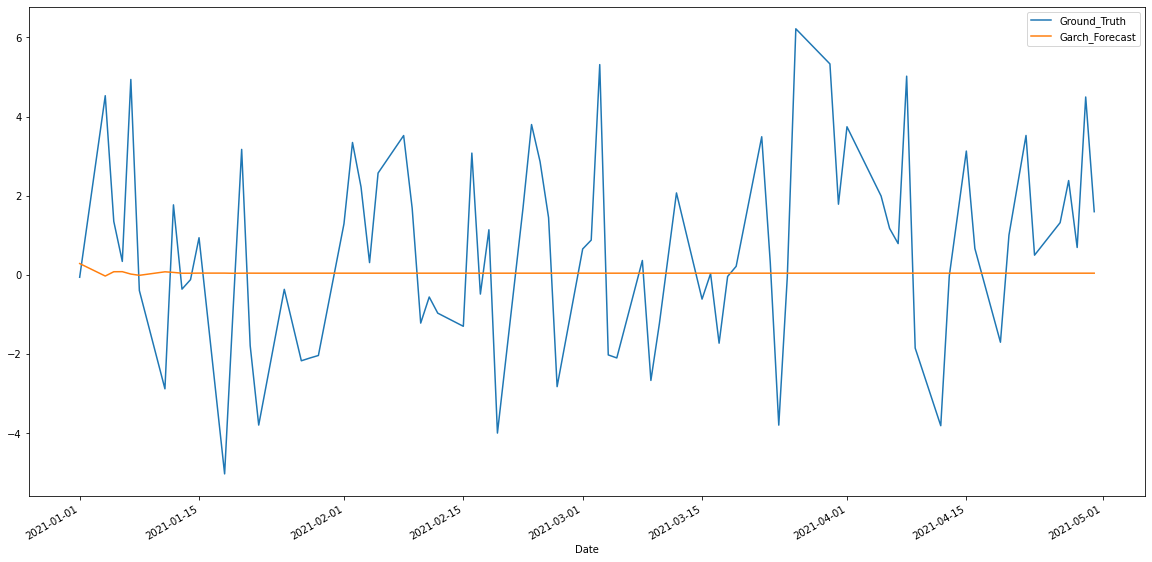

In [145]:
result.iloc[:, [0, 1]].plot(figsize=FIG_SIZE)  # Garch is useless because the lack of exegenous data.